In [39]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [40]:
data_train = pd.read_csv('DataIDX.csv')
data_train.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,09/07/2021,"314,95","314,81","315,85","313,91","718,82M","0,07%"
1,08/07/2021,"314,73","316,40","317,10","313,27","702,35M","-0,08%"
2,07/07/2021,"314,97","318,76","318,76","313,73","667,57M","-0,53%"
3,06/07/2021,"316,65","319,17","319,17","316,32","640,12M","-0,32%"
4,05/07/2021,"317,68","321,10","321,49","316,59","597,84M","-1,17%"


In [41]:
data_train.shape

(2711, 7)

In [42]:
data_train.isnull().sum()

Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64

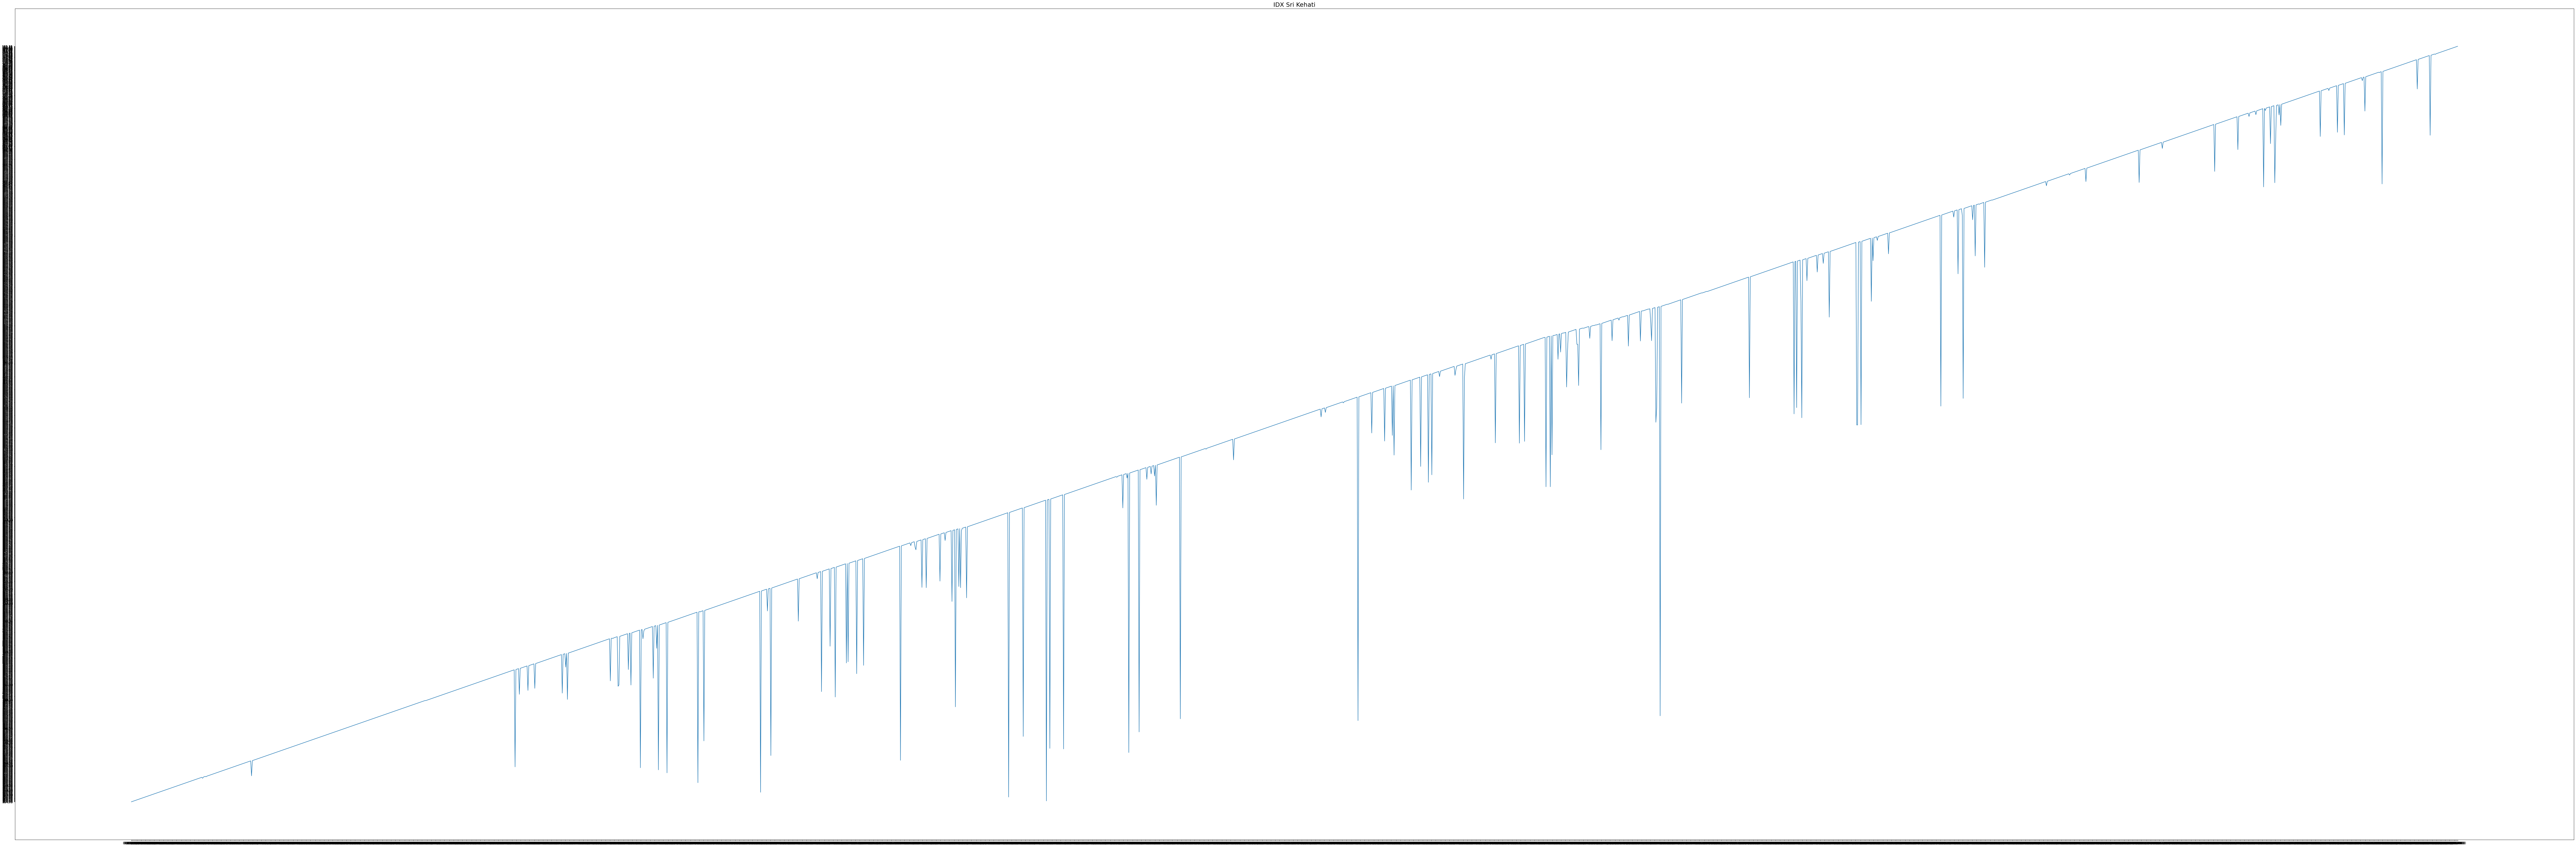

In [44]:
dates = data_train['Tanggal'].values
harga  = data_train['Terakhir'].values
 
 
plt.figure(figsize=(150,50))
plt.plot(dates, harga)
plt.title('IDX Sri Kehati',
          fontsize=20);

In [55]:
train_size = int(data_train.shape[0]*0.8)

train_data_train = data_train[:train_size]
val_data_train = data_train[train_size:]

train_sentences = train_data_train.Terakhir.to_numpy()
train_labels = train_data_train.Tanggal.to_numpy()
val_sentences = val_data_train.Terakhir.to_numpy()
val_labels = val_data_train.Tanggal.to_numpy()

In [57]:
train_sentences.shape, val_sentences.shape

((2168,), (543,))

In [58]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [59]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [61]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
166/166 [==============================] - 20s 103ms/step - loss: 0.1632 - mae: 0.3688
Epoch 2/100
166/166 [==============================] - 18s 106ms/step - loss: 0.1542 - mae: 0.3535
Epoch 3/100
166/166 [==============================] - 18s 105ms/step - loss: 0.1435 - mae: 0.3292
Epoch 4/100
166/166 [==============================] - 18s 104ms/step - loss: 0.1317 - mae: 0.2988
Epoch 5/100
166/166 [==============================] - 17s 104ms/step - loss: 0.1193 - mae: 0.2676
Epoch 6/100
166/166 [==============================] - 17s 103ms/step - loss: 0.1070 - mae: 0.2365
Epoch 7/100
166/166 [==============================] - 17s 104ms/step - loss: 0.0954 - mae: 0.2076
Epoch 8/100
166/166 [==============================] - 17s 104ms/step - loss: 0.0851 - mae: 0.1804
Epoch 9/100
166/166 [==============================] - 17s 104ms/step - loss: 0.0764 - mae: 0.1557
Epoch 10/100
166/166 [==============================] - 17s 104ms/step - loss: 0.0693 - mae: 0.1352
Epoch 11/